In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
data= pd.read_csv('drugsCom_raw (1).csv' , encoding='Latin-1')

In [3]:
data.head()

Unnamed: 0                  drugName                     condition  \
0     206461                 Valsartan  Left Ventricular Dysfunction   
1      95260                Guanfacine                          ADHD   
2      92703                    Lybrel                 Birth Control   
3     138000                Ortho Evra                 Birth Control   
4      35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating            date  \
0  "It has no side effect, I take it in combinati...     9.0       20-May-12   
1  "My son is halfway through his fourth week of ...     8.0  April 27, 2010   
2  "I used to take another oral contraceptive, wh...     5.0       14-Dec-09   
3  "This is my first time using any form of birth...     8.0       03-Nov-15   
4  "Suboxone has completely turned my life around...     9.0       27-Nov-16   

   usefulCount  
0         27.0  
1        192.0  
2         17.0  
3         10.0  
4         37.0

In [4]:
list(data)

['Unnamed: 0',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [5]:
data.shape

(161290, 7)

In [6]:
data.nunique()

Unnamed: 0     161283
drugName         3441
condition         890
review         112333
rating             10
date             3579
usefulCount       389
dtype: int64

In [7]:
data.dtypes

Unnamed: 0      object
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount    float64
dtype: object

In [8]:
data.isnull().sum()

Unnamed: 0       7
drugName        13
condition      912
review          13
rating          25
date            25
usefulCount     25
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data =data.dropna()

In [11]:
data.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [12]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
161285    False
161286    False
161287    False
161288    False
161289    False
Length: 160366, dtype: bool

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160366 entries, 0 to 161289
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   160366 non-null  object 
 1   drugName     160366 non-null  object 
 2   condition    160366 non-null  object 
 3   review       160366 non-null  object 
 4   rating       160366 non-null  float64
 5   date         160366 non-null  object 
 6   usefulCount  160366 non-null  float64
dtypes: float64(2), object(5)
memory usage: 9.8+ MB


In [14]:
data.describe()

rating    usefulCount
count  160366.000000  160366.000000
mean        6.995579      28.098793
std         3.272410      36.460437
min         1.000000       0.000000
25%         5.000000       6.000000
50%         8.000000      16.000000
75%        10.000000      36.000000
max        10.000000    1291.000000

## DATA VISUALIZATION

## VISUALIZATION OF DRUG NAMES / RATINGS / CONDITIONS

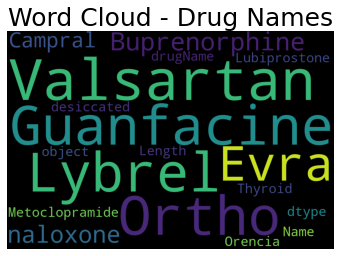

In [15]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

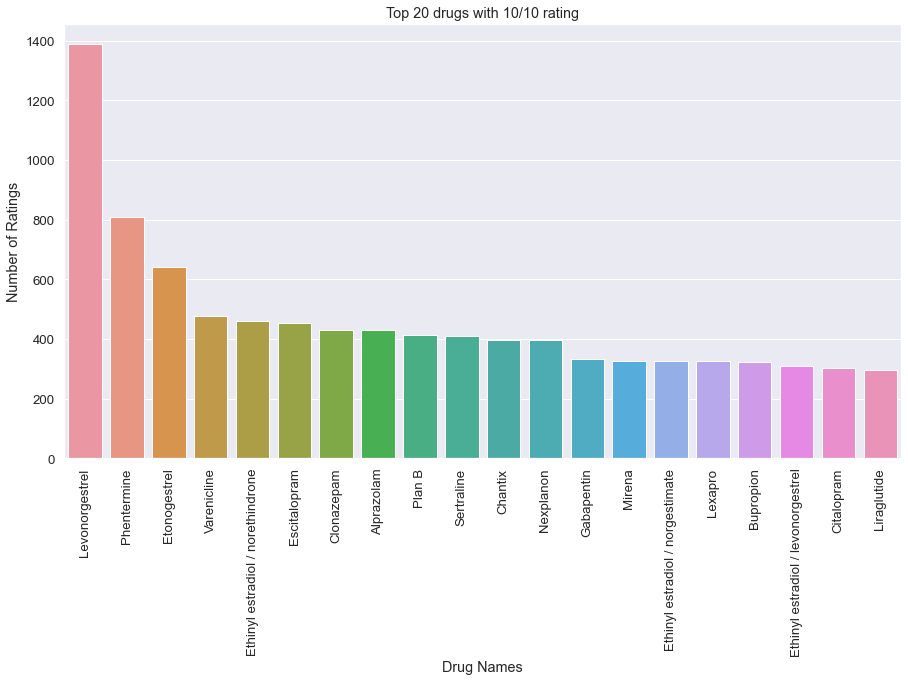

In [16]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

 The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings

In [17]:
# Distribution of rating by size
data.groupby('rating').size()

rating
1.0     21504
2.0      6878
3.0      6464
4.0      4980
5.0      7958
6.0      6301
7.0      9391
8.0     18789
9.0     27374
10.0    50727
dtype: int64

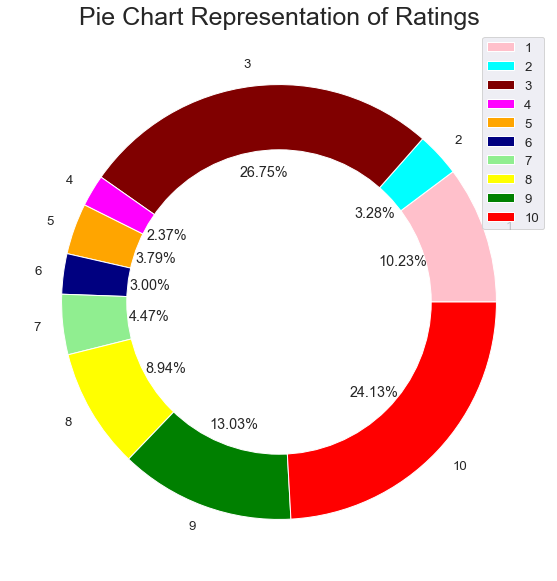

In [18]:
# making a donut chart to represent share of each ratings

size = [21619, 6930, 56512, 5012, 8012, 6343, 9452,
       18888, 27526, 50971]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow', 'green', 'red']
labels = "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0.5, 0, 'Rating')

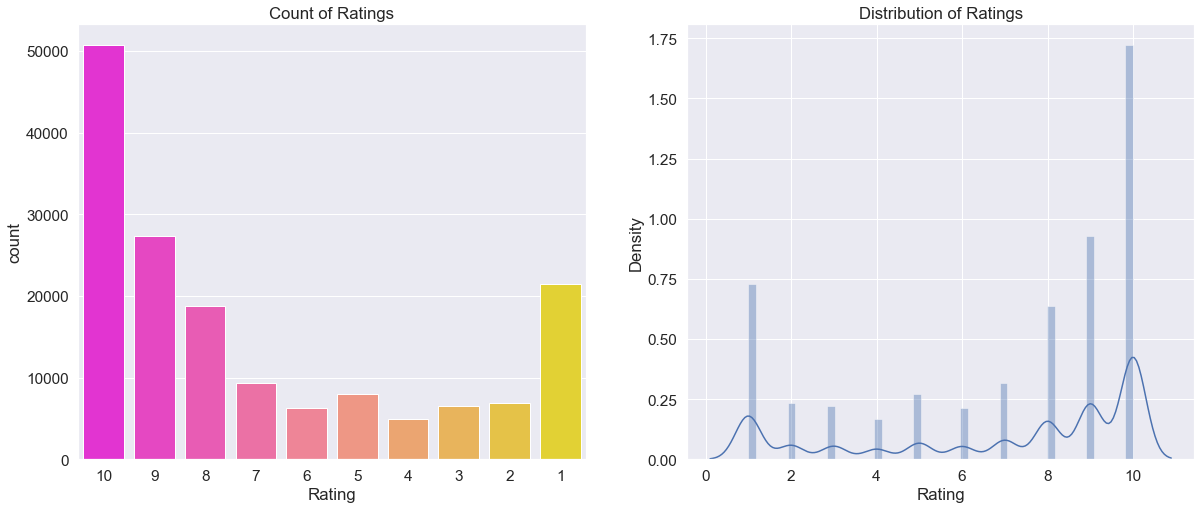

In [19]:
import warnings
warnings.filterwarnings('ignore')
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

 The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.

In [20]:
conditions = data.condition.value_counts().sort_values(ascending=False)
conditions[:10]

Birth Control      28782
Depression          9068
Pain                6145
Anxiety             5899
Acne                5587
Bipolar Disorde     4223
Insomnia            3672
Weight Loss         3608
Obesity             3568
ADHD                3382
Name: condition, dtype: int64

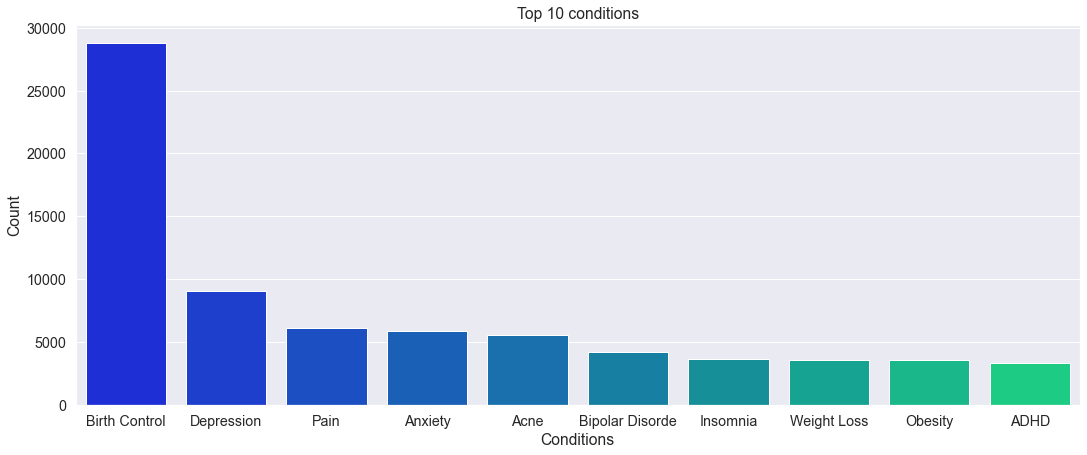

In [21]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");


 The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.

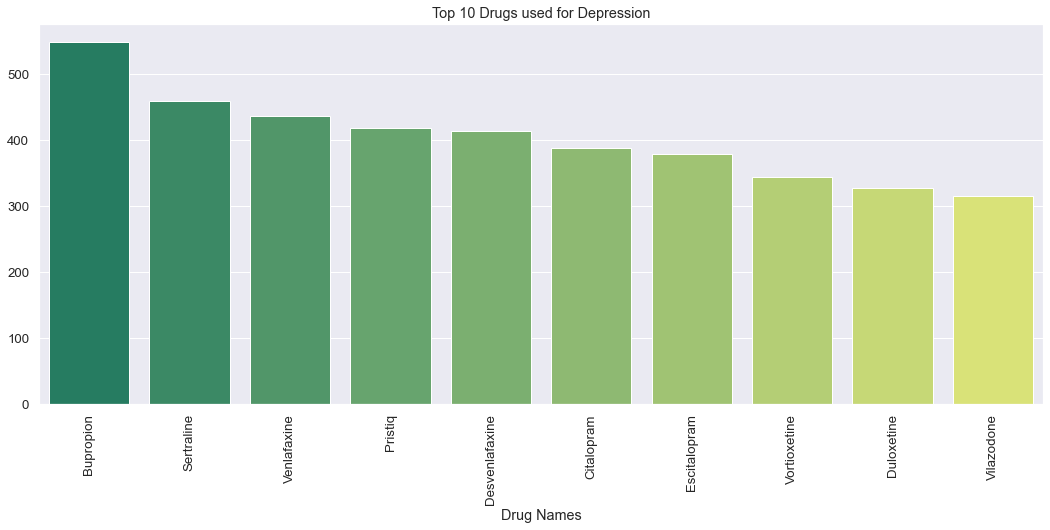

In [22]:
# Top 10 drugs which are used for the top condition, that is Depression
df1 = data[data['condition'] == 'Depression']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

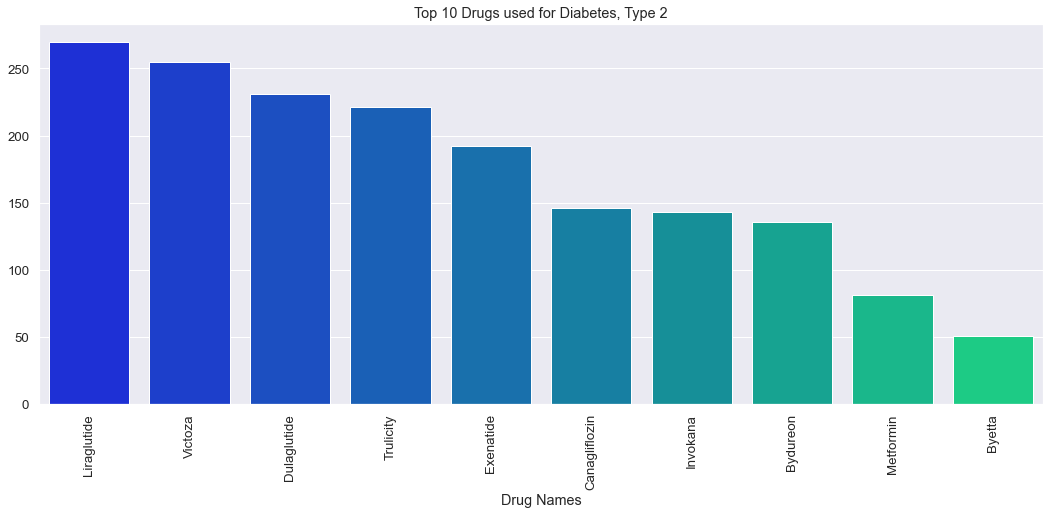

In [23]:
# Top 10 drugs which are used for the top condition, that is Diabetes, Type 2
df1 = data[data['condition'] == 'Diabetes, Type 2']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'winter')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Diabetes, Type 2")
plt.setp(sns_.get_xticklabels(), rotation = 90);

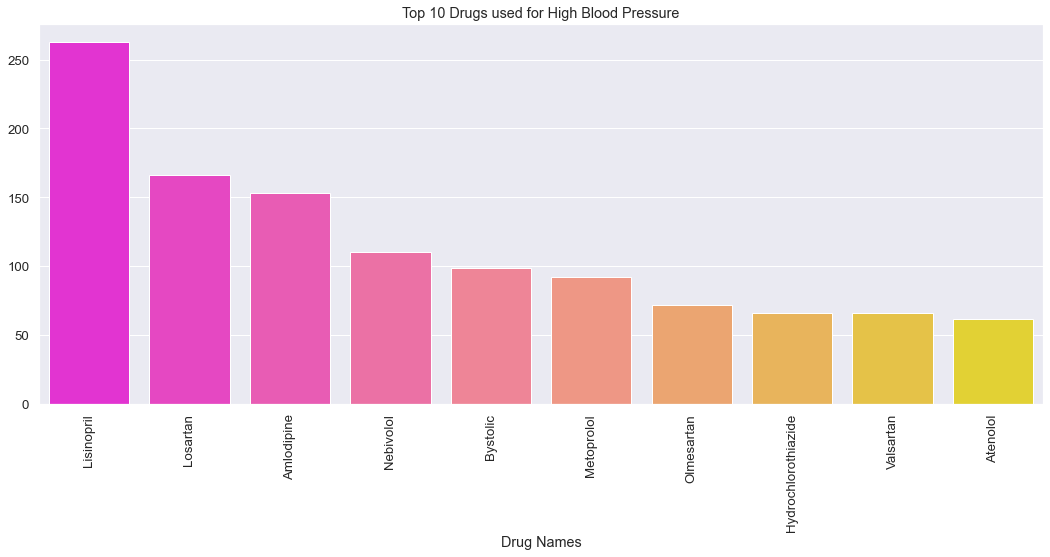

In [24]:
# Top 10 drugs which are used for the top condition, that is High Blood Pressure
df1 = data[data['condition'] == 'High Blood Pressure']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'spring')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for High Blood Pressure")
plt.setp(sns_.get_xticklabels(), rotation = 90);

 This a bar graph which exhibits the top 10 drug names for the people suffering from High Blood Pressure. In this data set 'Lisinopril' is the most prominent drug by a very big margin.

## VISUALIZATION OF REVIEWS

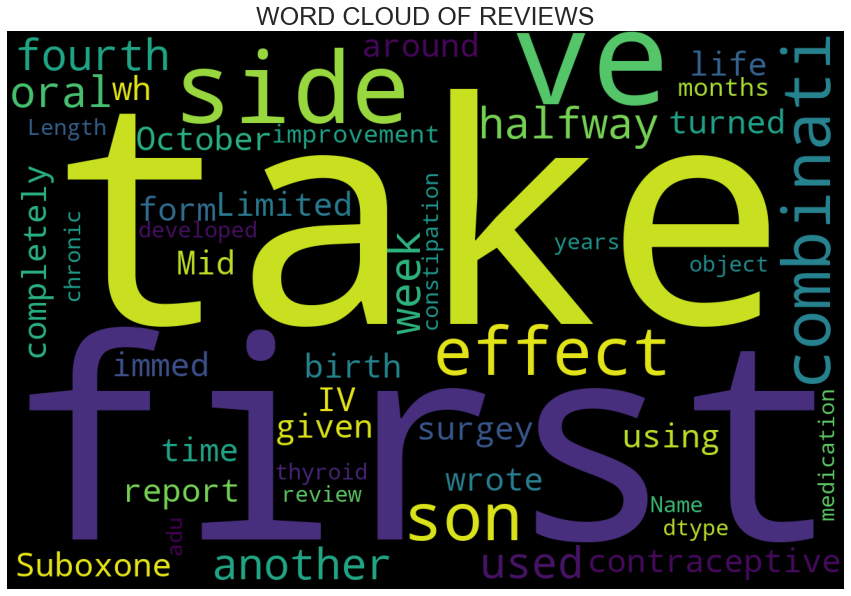

In [25]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [26]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    120540
0.0     39826
Name: Review_Sentiment, dtype: int64

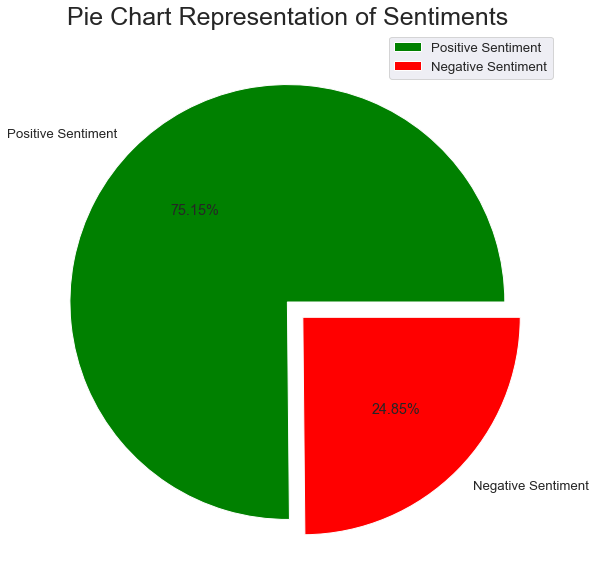

In [27]:
# a pie chart to represent the sentiments of the patients

size = [121192, 40073]
colors = ['green', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

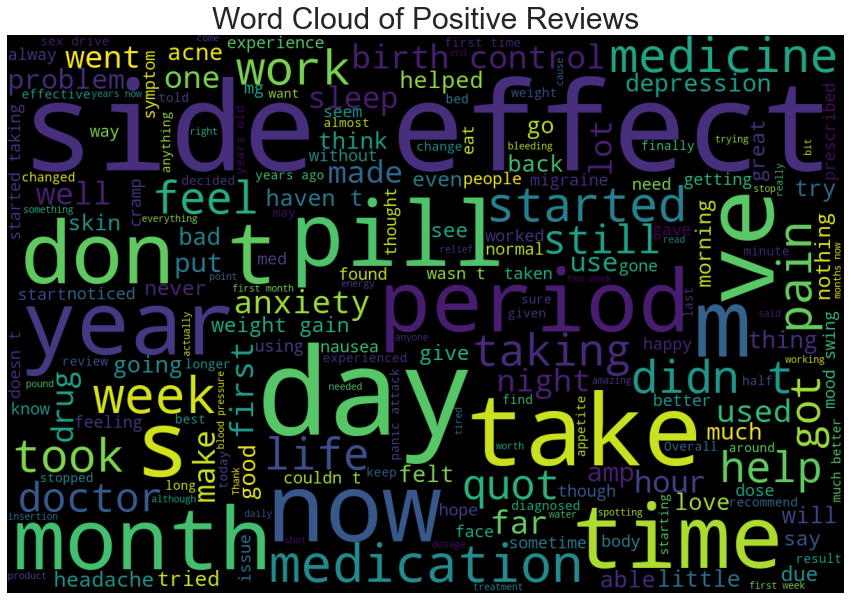

In [28]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

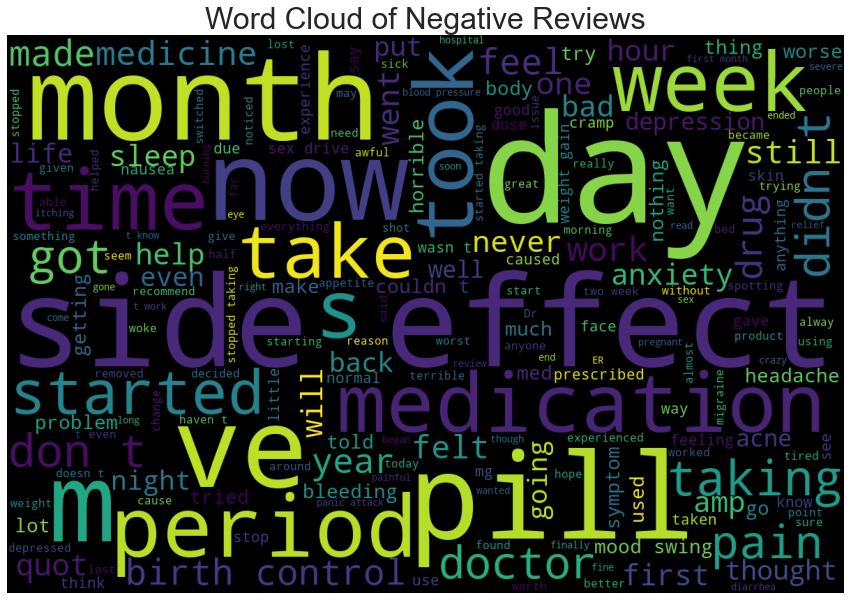

In [29]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


## VISUALIZATION OF REVIEWS BASED ON DATETIME

In [30]:
rk = data.copy()

In [31]:
# converting the date into datetime format
rk['date'] = pd.to_datetime(rk['date'], errors = 'coerce')

# now extracting year from date
rk['Year'] = rk['date'].dt.year

# extracting the month from the date
rk['month'] = rk['date'].dt.month

# extracting the days from the date
rk['day'] = rk['date'].dt.day

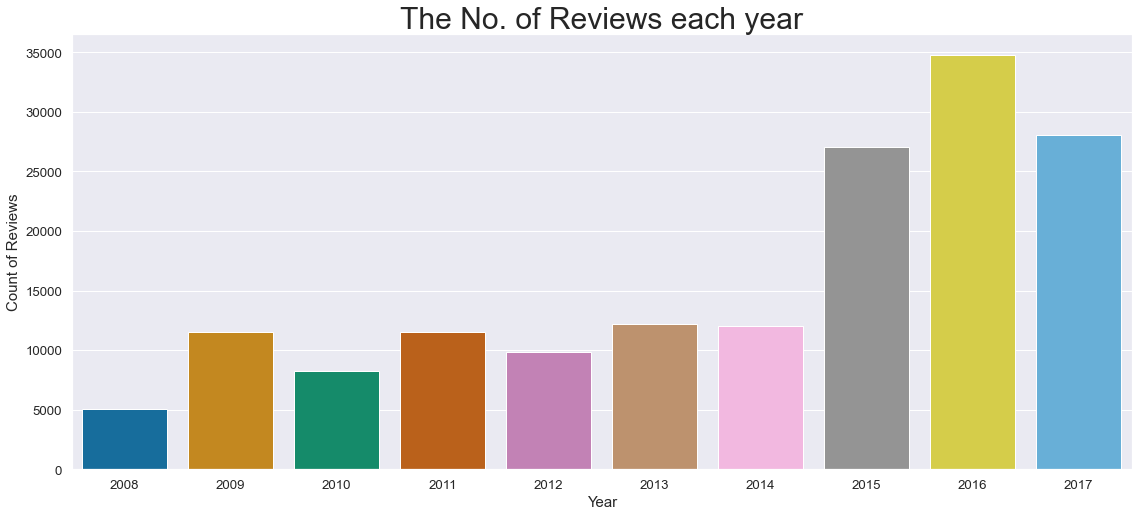

In [32]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(rk['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

 The is a Bar graph that shows the number of reviews in the data set per year. It can be inferred that most ratings are given in 2016 and 2008 has the least number of reviews

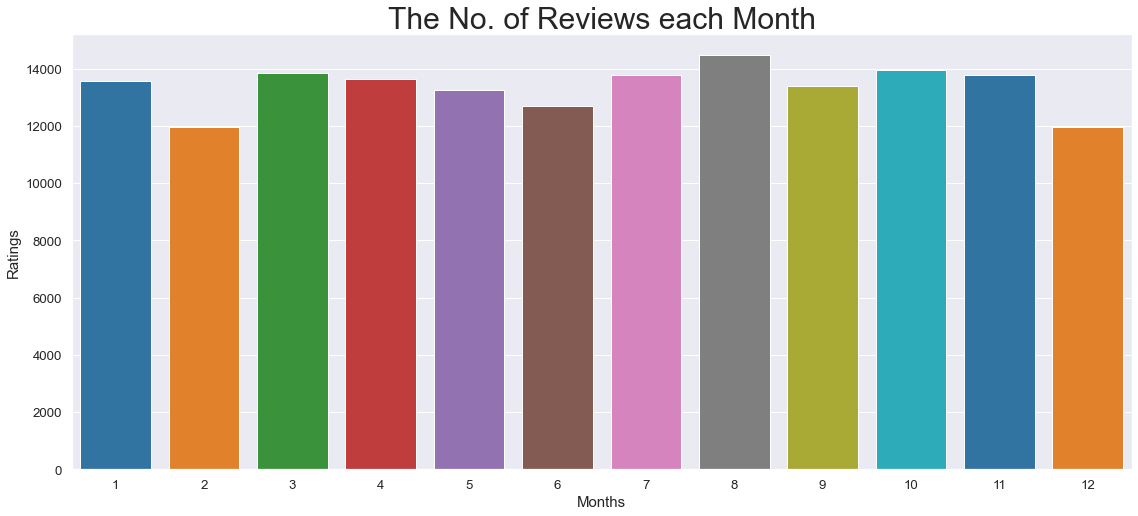

In [33]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(rk['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

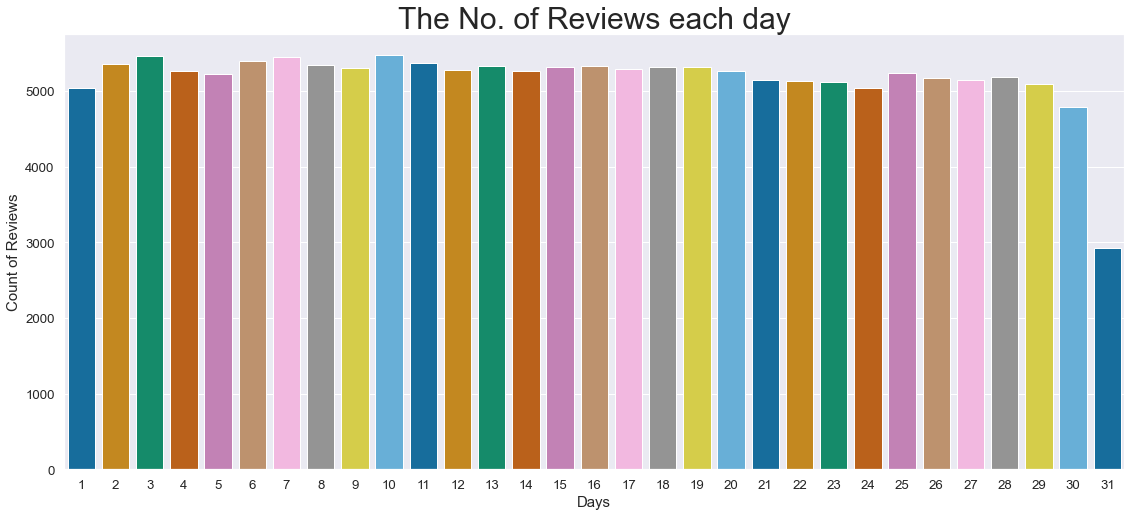

In [34]:
# looking at the no. of reviews in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(rk['day'], palette ='colorblind')
plt.title('The No. of Reviews each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

## VISUALIZATION OF USEFUL COUNT

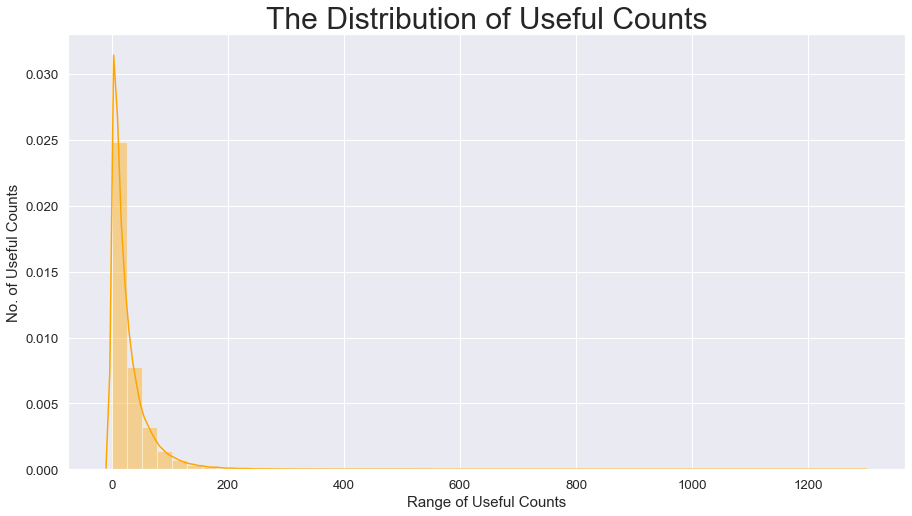

In [35]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [36]:
data1 = data[(data['condition']== 'Depression')|(data['condition']== 'High Blood Pressure')|(data['condition']== 'Diabetes, Type 2')]

In [37]:
data1

Unnamed: 0        drugName            condition  \
11          75612  L-methylfolate           Depression   
31          96233      Sertraline           Depression   
44         121333     Venlafaxine           Depression   
50         156544     Dulaglutide     Diabetes, Type 2   
67         131909      Effexor XR           Depression   
...           ...             ...                  ...   
161244     198130      Metoprolol  High Blood Pressure   
161251      34443        Bystolic  High Blood Pressure   
161271      86533        Invokana     Diabetes, Type 2   
161279      93069    Vortioxetine           Depression   
161283     103458        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      "I have taken anti-depressants for years, with...    10.0   
31      "1 week on Zoloft for anxiety and mood swings....     8.0   
44      "my gp started me on Venlafaxine yesterday to ...     4.0   
50      "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67      "This medicine saved my life. I was at my wits...    10.0   
...                                                   ...     ...   
161244  "It is fourth blood pressure pill for me. It f...     4.0   
161251  "While on Bystolic my feet and arms were numb....     1.0   
161271  "I just got diagnosed with type 2. My doctor p...     9.0   
161279  "This is the third med I&#039;ve tried for anx...     2.0   
161283  "I have only been on Tekturna for 9 days. The ...     7.0   

                  date  usefulCount  Review_Sentiment  
11           09-Mar-17         54.0               1.0  
31           07-May-11          3.0               1.0  
44      April 27, 2016          3.0               0.0  
50           24-Oct-17         24.0               1.0  
67           20-Jun-13        166.0               1.0  
...                ...          ...               ...  
161244       15-Jul-09         39.0               0.0  
161251       18-Jul-09         25.0               0.0  
161271       23-Oct-15         47.0               1.0  
161279       17-Jul-16         33.0               0.0  
161283       07-Feb-10         18.0               1.0  

[13942 rows x 8 columns]

In [38]:
new = data1.drop(['Unnamed: 0',"drugName",'rating','date','usefulCount'],axis = 1)

In [39]:
new

condition  \
11               Depression   
31               Depression   
44               Depression   
50         Diabetes, Type 2   
67               Depression   
...                     ...   
161244  High Blood Pressure   
161251  High Blood Pressure   
161271     Diabetes, Type 2   
161279           Depression   
161283  High Blood Pressure   

                                                   review  Review_Sentiment  
11      "I have taken anti-depressants for years, with...               1.0  
31      "1 week on Zoloft for anxiety and mood swings....               1.0  
44      "my gp started me on Venlafaxine yesterday to ...               0.0  
50      "Hey Guys,  It&#039;s been 4 months since my l...               1.0  
67      "This medicine saved my life. I was at my wits...               1.0  
...                                                   ...               ...  
161244  "It is fourth blood pressure pill for me. It f...               0.0  
161251  "While on Bystolic my feet and arms were numb....               0.0  
161271  "I just got diagnosed with type 2. My doctor p...               1.0  
161279  "This is the third med I&#039;ve tried for anx...               0.0  
161283  "I have only been on Tekturna for 9 days. The ...               1.0  

[13942 rows x 3 columns]

In [40]:
new.condition.value_counts()

Depression             9068
Diabetes, Type 2       2554
High Blood Pressure    2320
Name: condition, dtype: int64

In [41]:
# Segregating dataframe for analyzing individual condition
new_depression = new[(new['condition']=='Depression')]
new_diabetes = new[(new['condition']=='Diabetes, Type 2')]
new_Bp = new[(new['condition']=='High Blood Pressure')]

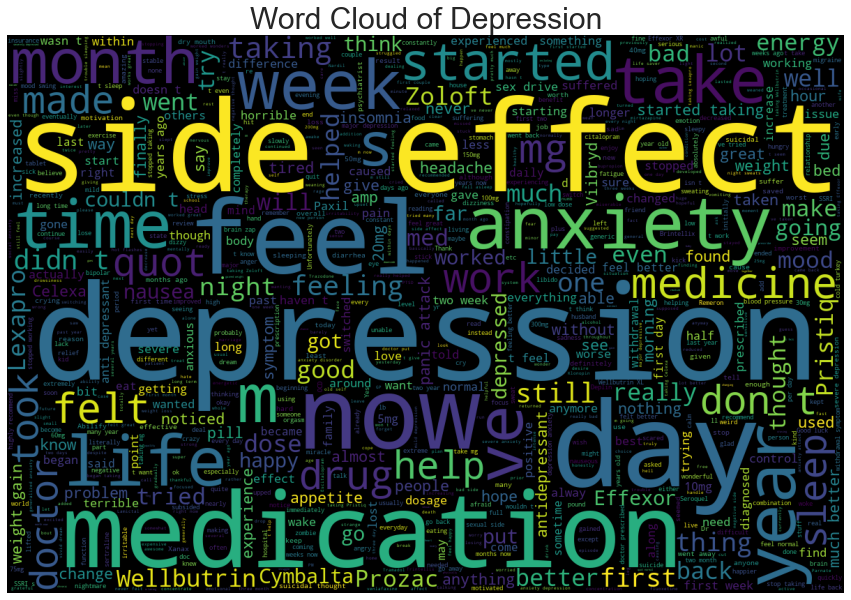

In [42]:
# making Words cloud for the condition of Depession

from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcloud = WordCloud(max_words = 800, width = 1200, height = 800).generate(" ".join(new_depression.review))
plt.title('Word Cloud of Depression', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

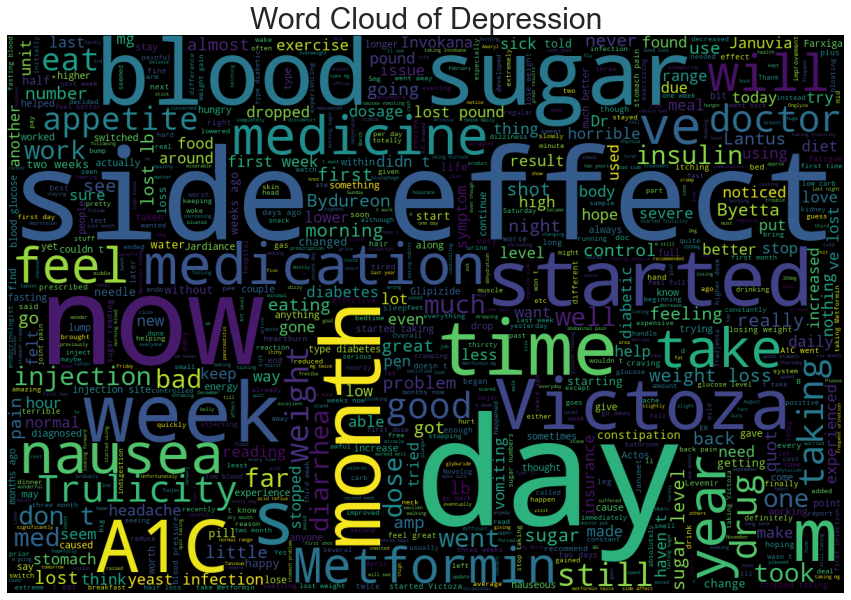

In [43]:
# making Words cloud for the condition of Diabetes, Type 2

from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcloud = WordCloud(max_words = 800, width = 1200, height = 800).generate(" ".join(new_diabetes.review))
plt.title('Word Cloud of Depression', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

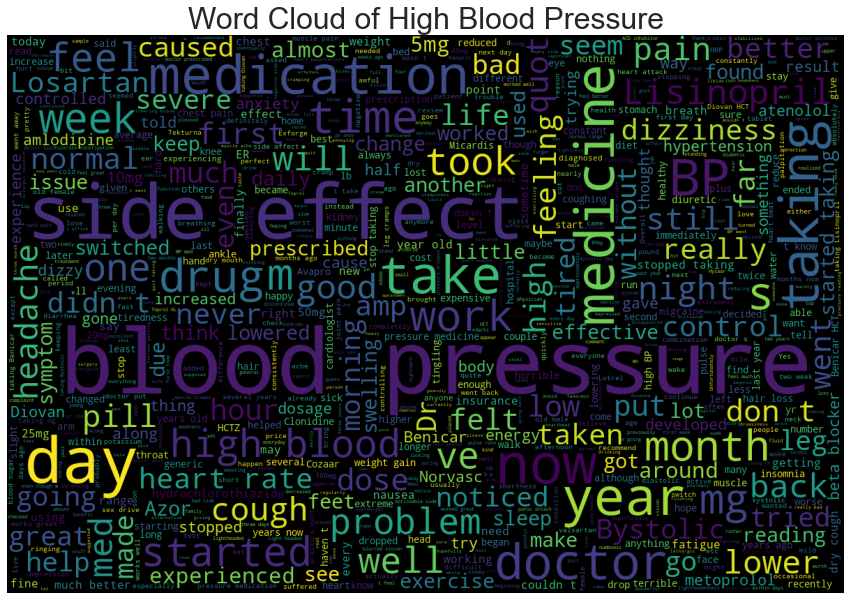

In [44]:
# making Words cloud for the condition of High Blood Pressure 

from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcloud = WordCloud(max_words = 800, width = 1200, height = 800).generate(" ".join(new_Bp.review))
plt.title('Word Cloud of High Blood Pressure', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Data preprocessing

In [45]:
new['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\n\nI only take Cymbalta now mostly for pain.\n\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [46]:
new['review'][152]

'"I was really glad that I experienced none of the possible side effects. After four weeks I did notice my mood getting better, but after that some things happened in my life (my dog had surgery, a break-up, a hair experiment gone wrong) that I was not able to deal with and I got worse. I felt myself spiraling downward and my anxiety shot way up. It&#039;s month number two and I just switched to lexapro. Hope it helps."'

In [47]:
for i, col in enumerate(new.columns):
    if new[col].dtype == 'object':  # Check if column data type is string
        new.iloc[:, i] = new.iloc[:, i].str.replace('""', '')
    else:
        new.iloc[:, i] = new.iloc[:, i].astype(str).str.replace('""', '')


In [48]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [49]:
new

condition  \
11      Depression            
31      Depression            
44      Depression            
50      Diabetes, Type 2      
67      Depression            
...            ...            
161244  High Blood Pressure   
161251  High Blood Pressure   
161271  Diabetes, Type 2      
161279  Depression            
161283  High Blood Pressure   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  \
11      "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\n\nI only take Cymbalta now mostly for pain.\n\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."                                                                                                                                                                                                                                                                                                                      
31      "1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
44      "my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"                                                           
50      "Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so

## Stopwords

In [50]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [51]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization

In [52]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [54]:
nltk.download('omw-1.4')
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


sportingly
very
troubled


In [55]:
from bs4 import BeautifulSoup
import re
import string

In [56]:
def review_to_words(raw_review):
    # delete html 
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    # make a space
    latters_only = re.sub('[^a-zA-Z]', ' ',review_text)
    # lower letters
    words = latters_only.lower().split()
    # stop words
    meaningful_words = [w for w in words if not w in stop]
    # lemmitization
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    #space join words
    return(' '.join(lemmatize_words))

In [57]:
new['review_clean']=new['review'].apply(review_to_words)

In [58]:
new.head()

condition  \
11  Depression         
31  Depression         
44  Depression         
50  Diabetes, Type 2   
67  Depression         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review  \
11  "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\n\nI only take Cymbalta now mostly for pain.\n\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."                                                                                                                                                                                                                                                                                                                      
31  "1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
44  "my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"                                                           
50  "Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet clos

## Creating Features and Target Variable

In [59]:
X = new['review_clean']
y = new['condition']

In [60]:
# stratify the proportions of all categories are maintained in both train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=0)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Bag of Words

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [63]:
count_train

<11153x11176 sparse matrix of type '<class 'numpy.int64'>'
	with 329410 stored elements in Compressed Sparse Row format>

## Machine Learning Models

## Naive Bayes

accuracy:   0.954
Confusion matrix, without normalization


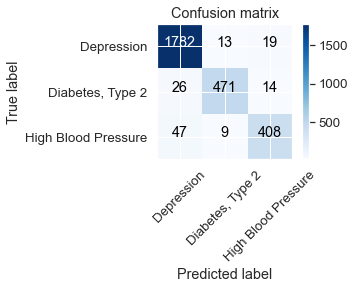

In [64]:
from sklearn.naive_bayes import MultinomialNB 
import itertools 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])


## Passive Aggressive Classifier

accuracy:   0.954
Confusion matrix, without normalization


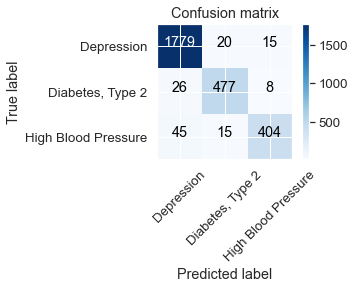

In [65]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Models

## Naive Bayes

accuracy:   0.898
Confusion matrix, without normalization


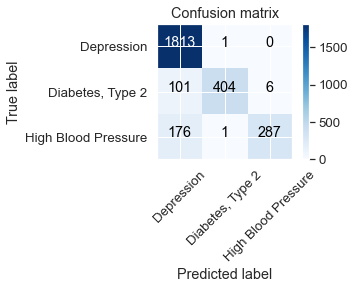

In [67]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF

accuracy:   0.960
Confusion matrix, without normalization


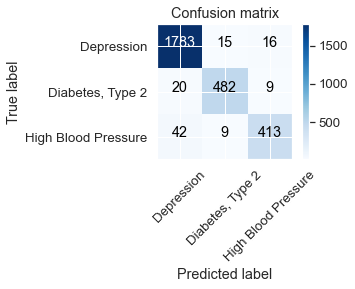

In [68]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF: Bigrams

In [69]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.967
Confusion matrix, without normalization


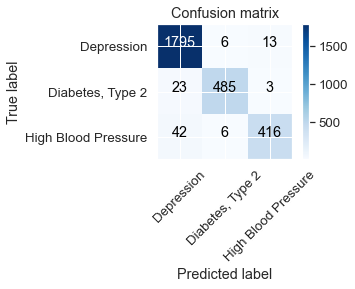

In [70]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF : Trigrams

accuracy:   0.967
Confusion matrix, without normalization


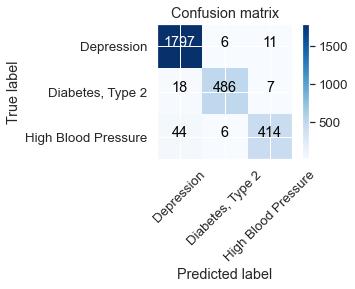

In [71]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

##  Doc2Vec embedding model



In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(new['review_clean'], new['condition'], test_size=0.2, random_state=42)

# Tokenize the reviews for Doc2Vec
train_corpus = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_train)]
test_corpus = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_test)]

# Train the Doc2Vec model
vector_size = 100
window_size = 5
min_count = 2
workers = 4
epochs = 20
model = Doc2Vec(train_corpus, vector_size=vector_size, window=window_size, min_count=min_count, workers=workers, epochs=epochs)

# Convert the text data to vector embeddings using the trained Doc2Vec model
X_train_vec = [model.infer_vector(doc.words) for doc in train_corpus]
X_test_vec = [model.infer_vector(doc.words) for doc in test_corpus]

# Convert the target variable to one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train.factorize()[0])
y_test_onehot = np_utils.to_categorical(y_test.factorize()[0])

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(units=256, activation='relu', input_dim=vector_size))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(units=128, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(units=3, activation='softmax'))
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network model
batch_size = 32
epochs = 50
model_nn.fit(np.array(X_train_vec), y_train_onehot, batch_size=batch_size, epochs=epochs, verbose=1)

# Test the neural network model
y_pred_onehot = model_nn.predict(np.array(X_test_vec))
y_pred = np.argmax(y_pred_onehot, axis=1)
accuracy = accuracy_score(y_test.factorize()[0], y_pred)
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/50
349/349 [==============================] - 6s 9ms/step - loss: 0.4911 - accuracy: 0.8013
Epoch 2/50
349/349 [==============================] - 3s 8ms/step - loss: 0.3412 - accuracy: 0.8739
Epoch 3/50
349/349 [==============================] - 3s 9ms/step - loss: 0.3147 - accuracy: 0.8794
Epoch 4/50
349/349 [==============================] - 3s 9ms/step - loss: 0.2946 - accuracy: 0.8901
Epoch 5/50
349/349 [==============================] - 3s 8ms/step - loss: 0.2801 - accuracy: 0.8925
Epoch 6/50
349/349 [==============================] - 3s 8ms/step - loss: 0.2745 - accuracy: 0.8946
Epoch 7/50
349/349 [==============================] - 3s 8ms/step - loss: 0.2517 - accuracy: 0.9030
Epoch 8/50
349/349 [==============================] - 2s 6ms/step - loss: 0.2414 - accuracy: 0.9079
Epoch 9/50
349/349 [==============================] - 2s 6ms/step - loss: 0.2333 - accuracy: 0.9109
Epoch 10/50
349/349 [==============================] - 3s 7ms/step - loss: 0.2230 - accuracy: 0.9151

## Most important Features

In [73]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)

In [74]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression drop pill 2.4390988080206615
Depression short stint 2.7208706115689014
Depression year trying 2.853484001568435
Depression evening thought 3.0360695879800073
Depression know causing 3.4231010107920956
Depression prayed sleep 3.594522369882943
Depression beginning tonight 3.6898178426334614
Depression helped sleeping 3.748750183062336
Depression better cause 4.783154008090395
Depression later got 9.450693007648722


In [75]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'High Blood Pressure')

High Blood Pressure making sure 2.667128978231955
High Blood Pressure difference holiday 2.703962711128001
High Blood Pressure working saved 2.7365569503215297
High Blood Pressure change cymbalta 2.7940598652943276
High Blood Pressure edge daily 3.0944354415282525
High Blood Pressure bad suffer 3.543014336084984
High Blood Pressure day miserable 3.6441282950093186
High Blood Pressure difference treatment 5.709440917808722
High Blood Pressure gym make 5.881451083989854
High Blood Pressure doctor yr 8.900356547042675


In [76]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 trying paxil 1.9766708541423763
Diabetes, Type 2 neurology 2.0009929820614634
Diabetes, Type 2 positive slight 2.109649442491605
Diabetes, Type 2 sensitive drug 2.336145672726535
Diabetes, Type 2 aggression feeling 2.9931702765676396
Diabetes, Type 2 eat portion 3.2267720230830372
Diabetes, Type 2 lithium mentally 3.3027780983502693
Diabetes, Type 2 toll depression 3.79894115179681
Diabetes, Type 2 eating lost 3.8539723364075216
Diabetes, Type 2 dimension 4.013320889925559


## Sample Predictions

In [77]:
new.tail()

condition  \
161244  High Blood Pressure   
161251  High Blood Pressure   
161271  Diabetes, Type 2      
161279  Depression            
161283  High Blood Pressure   

                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
161244  "It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why."                                                                                                                                                                                                                                   
161251  "While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112."                                                            
161271  "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me"                                                                                                                                                                                                                    
161279  "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap."                                                                                                                                                                                                          
161283  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."   

       Review_Sentiment  \
161244  0.0               
161251  0.0               
161271  1.0               
161279  0.0               
161283  1.0               

                                                                                                                                                                                                                                                                       review_clean  
161244  fourth blood pressure pill feel like partly working blood pressure problem usually happening anxiety attack doctor say know                                                                                                                                                  
161251  bystolic foot arm numb blood sugar became severely elevated glucose blood pressure pill good choice diabetic condition bystolic one week eight week later still suffering foot heel pain however going back vasotec blood sugar dropped back                                 
161271  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine              

In [78]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = data[(data['rating']>=9)&(data['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [79]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [80]:
sentences = [ "While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112.",
              "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap",
              "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"
            ]

In [81]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine f

In [82]:
df_testsent = predict_text(sentences)
df_testsent

test_sent  \
0  bystolic foot arm numb blood sugar became severely elevated glucose blood pressure pill good choice diabetic condition bystolic one week eight week later still suffering foot heel pain however going back vasotec blood sugar dropped back   
1  third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap                                                                                                                    
2  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                            

            prediction  
0  High Blood Pressure  
1  Depression           
2  Diabetes, Type 2

In [83]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [84]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'High Blood Pressure'